# 6.2 Exploring Relationships Task 

## Imports

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
path = r"C:\Users\malac\Downloads\Realtor.com cf"

In [9]:
path

'C:\\Users\\malac\\Downloads\\Realtor.com cf'

In [11]:
# Importing dataset as df

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'realtor-dataset-100k.csv'))

In [12]:
# Importing dataset as df

df = pd.read_pickle(os.path.join(path, '03 Scripts','realtor-dataset-100k.pkl'))

# Visualizations

# Correlation and Heat Maps

In [13]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'city', 'state',
       'house_size', 'sold_date'],
      dtype='object')

In [15]:
df.corr()

,price,bed,bath,acre_lot,house_size
price,1.000000,0.170096,0.380621,0.006343,0.129465
bed,0.170096,1.000000,0.461113,0.001312,0.059434
bath,0.380621,0.461113,1.000000,0.010693,0.098720
acre_lot,0.006343,0.001312,0.010693,1.000000,0.001091
house_size,0.129465,0.059434,0.098720,0.001091,1.000000


In [17]:
# Create a subset removing status and sold_date

sub = df[['price', 'bed', 'bath', 'acre_lot', 'city', 'state', 'house_size']]

In [18]:
sub

,price,bed,bath,acre_lot,city,state,house_size
0,105000,3,2,0,Adjuntas,Puerto Rico,920
1,80000,4,2,0,Adjuntas,Puerto Rico,1527
2,67000,2,1,0,Juana Diaz,Puerto Rico,748
3,145000,4,2,0,Ponce,Puerto Rico,1800
5,179000,4,3,0,San Sebastian,Puerto Rico,2520
...,...,...,...,...,...,...,...
96946,1479900,4,4,1,Holliston,Massachusetts,4077
96947,735000,3,2,0,Bristol,Rhode Island,1727
96952,785000,4,3,0,Barrington,Rhode Island,2166
97265,465000,3,2,0,Framingham,Massachusetts,1442


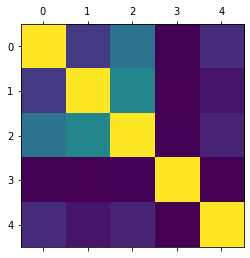

In [16]:
# Create a correlation heatmap 

plt.matshow(df.corr())
plt.show()

## Heatmap Using Seaborn

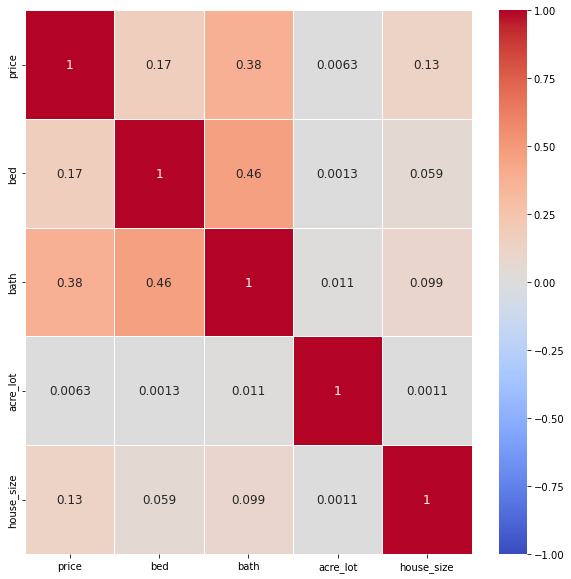

In [30]:
# Create heatmap using seaborn

f, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(sub.corr(), 
                      annot = True, 
                      cmap = 'coolwarm', 
                      ax = ax,
                      linewidths = .5,
                      vmin = -1,
                      vmax = 1,
                      annot_kws = {'size': 12})
                     

In [ ]:
# Export heatmap, bbox_inches fits graph

heatmap.get_figure().savefig('heatmap.png', bbox_inches='tight')

## What does this mean?

The correlations of this heatmap show us the relationships between different variables. 1 = strong positive relationship. 0 = no relationship. -1 strong negative relationship. 

# Scatterplots

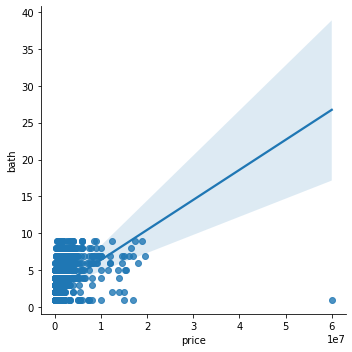

In [42]:
# Create scatterplot for price and bath

sns.lmplot(x = 'price', y = 'bath',data = df)

This chart shows that this correlation is not very strong, but shows a slight positive relationship between the number of baths and price of the house. Also there is one outlier where a house with one bedroom cost a very high price. 

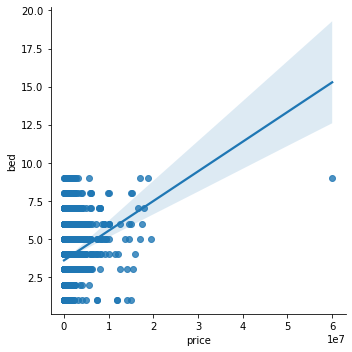

In [40]:
# Create scatterplot for price and bed

sns.lmplot(x = 'price', y = 'bed',data = df)

This chart also does not represent a strong relationship, but shows a slight positive relationship between the number of bedrooms and the price of the house.

# Pairplots

In [44]:
# Create a subset removing city and address

sub_2 = df[['price', 'bed', 'bath', 'acre_lot', 'house_size']]

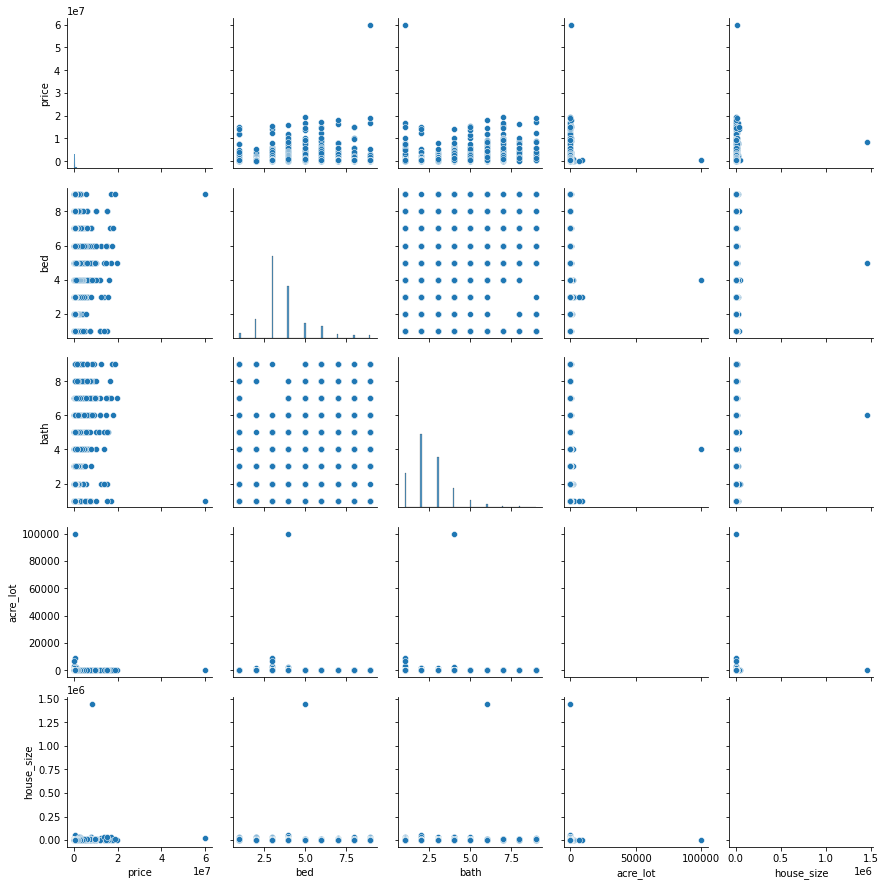

In [46]:
# Create pairplot

g = sns.pairplot(sub_2)

The only variables that are showing any type of correlation are number of bedroom and number of bathrooms. Those would be worth looking into more. 

# Catplots

<AxesSubplot:xlabel='price', ylabel='Count'>

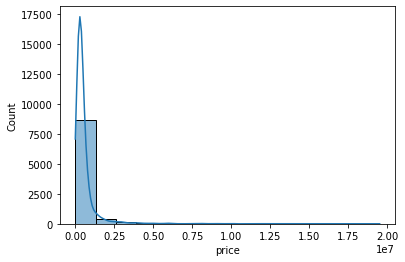

In [102]:
# Create hist of price to make price label


sns.histplot(df['price'], bins =15, kde = True)

## I am not sure why the x axis is displaying like this. I think 1 represents one million. This graph shows most houses are pirced below 125,000. The more expensive, the smaller amount of houses. 

In [96]:
# Perform describe funtion on price 

df['price'].describe()

count    9.307000e+03
mean     5.818554e+05
std      1.072139e+06
min      1.000000e+04
25%      2.399000e+05
50%      3.499000e+05
75%      5.500000e+05
max      1.950000e+07
Name: price, dtype: float64

In [97]:
# Find median 

df['price'].median()

349900.0

<AxesSubplot:xlabel='price', ylabel='price'>

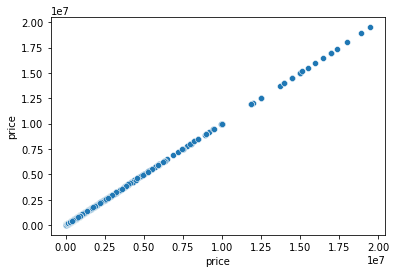

In [92]:
sns.scatterplot(x = 'price', y = 'price',data = df)

In [98]:
# Change price to floating int

df['price'] = df['price'].astype('float64')

In [85]:
# Replace outlier of 60,000,000

df['price'].max()

19500000.0

In [91]:
# Replace 60,000,000 with 6,000,000

df.loc[df['price'] == 60000000, 'price'] = 6000000

In [103]:
# Create groups based on prices describe funtion

df.loc[df['price'] < 239000, 'Price Group'] = 'Low price'

In [105]:
# Create groups based on prices describe funtion

df.loc[(df['price'] >= 239000) & (df['price'] < 550000), 'Price Group'] = 'Middle price'

In [106]:
# Create groups based on prices describe funtion

df.loc[df['price'] >= 550000, 'Price Group'] = 'High price'

In [107]:
# Check frequency

df['Price Group'].value_counts(dropna = False)

Middle price    4655
High price      2361
Low price       2291
Name: Price Group, dtype: int64

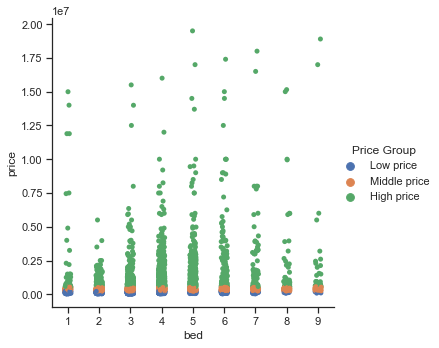

In [110]:
# Create a catplot in seaborn using price groups

sns.set(style='ticks')
g = sns.catplot(x='bed', y='price', hue='Price Group', data=df)

## This chart shows that there is a slight correlation in the number of bedrooms and the prices of houses. However, that indicatior alone is not enough to make an accurate predictions on future prices. 